# Chapter 07 連続型確率変数 first

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline

In [4]:
from scipy import integrate
import warnings

warnings.filterwarnings('ignore',
                       category=integrate.IntegrationWarning)

## 7.1　|　1 次元の連続確率変数

7.1.1　1 次元の連続確率変数の定義

In [5]:
x_range = np.array([0, 1])

In [6]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [7]:
X = [x_range, f]

In [8]:
# 積分
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [9]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)

res.fun

0

In [10]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [11]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [12]:
F(0.6) - F(0.4)

0.200

In [13]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

### 7.1.2　1 次元の連続確率分布の指標

In [14]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [15]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [16]:
E(X)

0.667

In [17]:
E(X, g=lambda x: 2*x + 3)

4.333

In [18]:
2 * E(X) + 3

4.333

In [19]:
mean = E(X)
def integrand(x):
    return (x - mean)**2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [20]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean)**2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [21]:
V(X)

0.056

In [22]:
V(X, lambda x: 2*x + 3)

0.222

In [23]:
2**2 * V(X)

0.222

## 7.2　|　2 次元の連続型確率変数

### 7.2.1　2 次元の連続型確率分布の定義

In [24]:
x_range = [0, 2]
y_range = [0, 1]

def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [25]:
XY = [x_range, y_range]

In [26]:
# 二重積分
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                [-np.inf, np.inf]])[0]

1.000

In [30]:
from functools import partial

# x を固定
def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]

def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [31]:
X = [x_range, f_X]
Y = [y_range, f_Y]

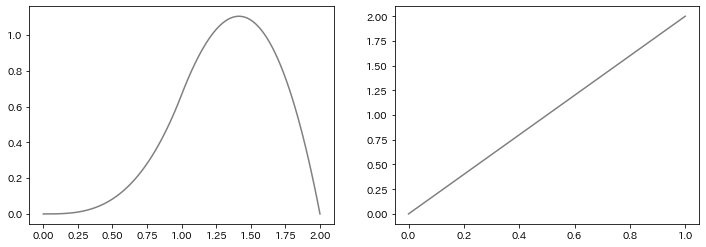

In [32]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')

### 7.2.2　2 次元の連続確率変数の指標

In [35]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
              [[-np.inf, np.inf],
              [-np.inf, np.inf]])[0]

1.333

In [38]:
def E(XY, g):
    x_range, y_range = f_xy, XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                          [-np.inf, np.inf]])[0]

In [39]:
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [41]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

In [42]:
a, b = 2, 3

In [44]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [45]:
a*mean_X + b*mean_Y

4.667

In [46]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
               [[-np.inf, np.inf],
               [-np.inf, np.inf]])[0]

0.111

In [47]:
def V(XY, g):
    x_range, y_range = f_xy, XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                          [-np.inf, np.inf]])[0]

In [48]:
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [49]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [50]:
def Cov(XY):
    x_range, y_range = f_xy, XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x - mean_X) * (y - mean_Y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                          [[-np.inf, np.inf],
                          [-np.inf, np.inf]])[0]

In [51]:
cov_xy = Cov(XY)
cov_xy

0.056

In [52]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [53]:
a**2 *var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

In [54]:
cov_xy / np.sqrt(var_X * var_Y)

0.7071117041227913